In [197]:
import pandas as pd
import os, sys
import csv
from pathlib2 import Path

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [208]:
forum_names = {}
forum_names['addiction'] = ['Treatment & Rehabilitation', 'Friends & Family', 'Testimonies and Success Stories']
forum_names['kin'] = ['Husbands & Boyfriends',' Wives & Girlfriends', 'LGBTQ', 'Adult Children and Siblings', 'Extended Family']
forum_names['death'] = ['Death Row & Capital Punishment', 'In Memoriam', 'Execution Watch',' What you need to know!']
forum_names['general'] = ['General Prison Talk']
forum_names['pre'] = ['Headed to Prison']
forum_names['inside'] = ['Straight Talk', 'Legal Help','Letters and Stories','Its Not All Bad','Education','Weddings','Remembering Those That Passed','Communication']
forum_names['intro'] = ['Introduce Yourself!']
forum_names['loving'] = ['Loving a Violent Offender','Loving a Lifer','Loving a Long-term Offender','When the Relationship is Over...','Met While Incarcerated']
forum_names['parent'] = ['Juvenile', 'Children in Prison', 'Raising Children', 'The Parents Lounge','Introductions']
forum_names['post'] = ['Probation, Parole & Supervision', 'Employment', 'Coming Home','Success Stories', 'Recidivism', 'Support Networks', 'Arrived at Home']

In [199]:
# PATHS

data_path = '/l/nx/data/deepspace/prisontalk/data/'
forums_path = 'forums/parsed/posts/'
themes_path = '/l/nx/data/deepspace/prisontalk/prisontalk/data/results/themes'

In [200]:
theme_files = get_forum_files('/l/nx/data/deepspace/prisontalk/prisontalk/data/results/themes', 'csv')

In [201]:
forum_map = pd.read_csv('~/prisontalk/data/results/fid_name_mapping.csv')

theme_files = get_forum_files(themes_path, 'csv')

forums = {}

for theme_file in theme_files:
    theme_df = pd.read_csv(theme_file, index_col='date', parse_dates=True, infer_datetime_format=True)
    theme_key = theme_file.split('/')[-1].split('.')[0].split('_')[0]
    
    forums[theme_key] = theme_df

pre


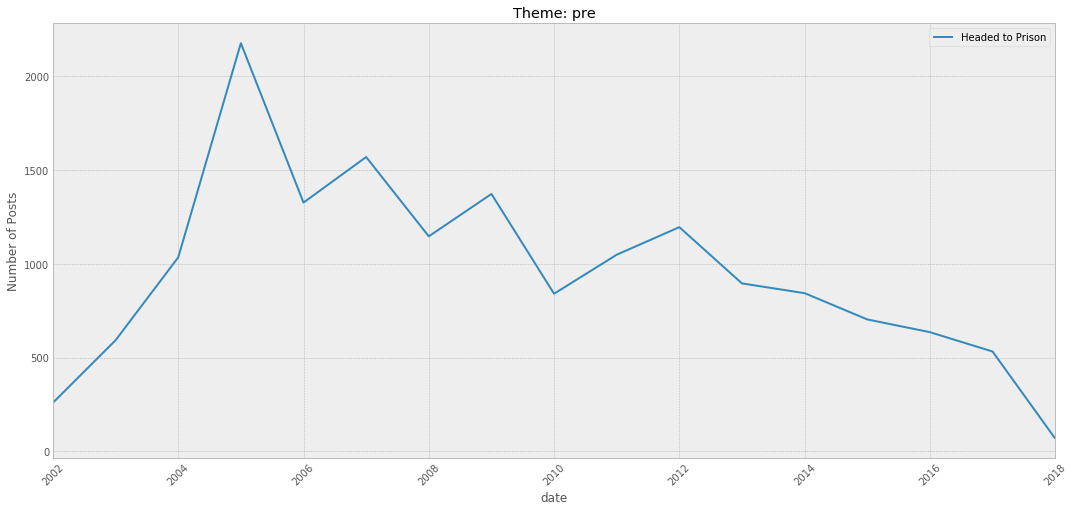

death


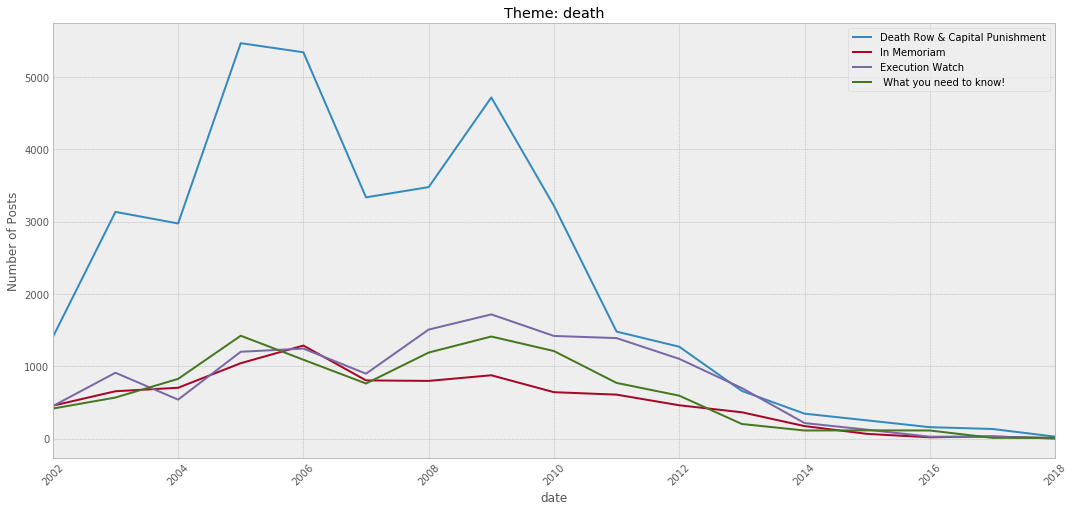

parent


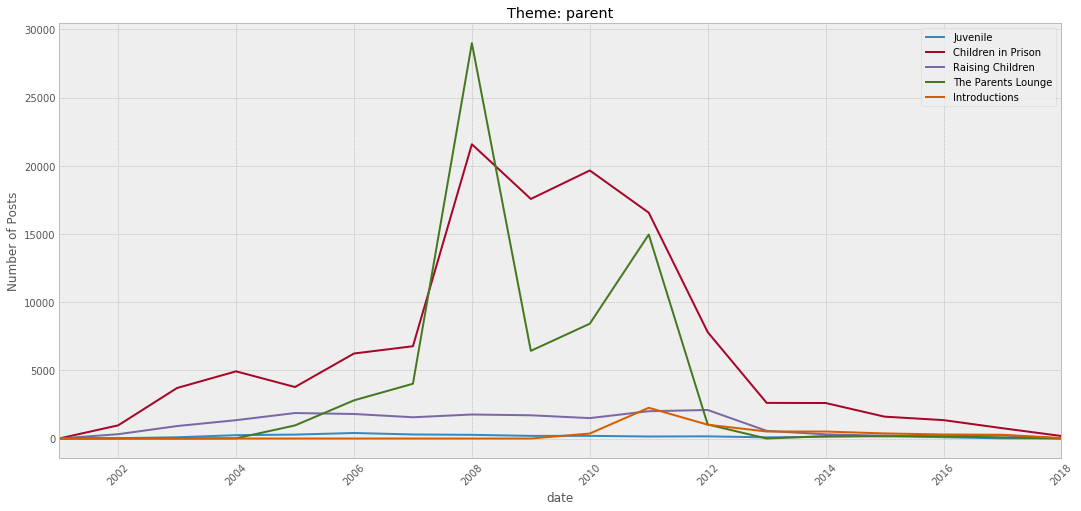

inside


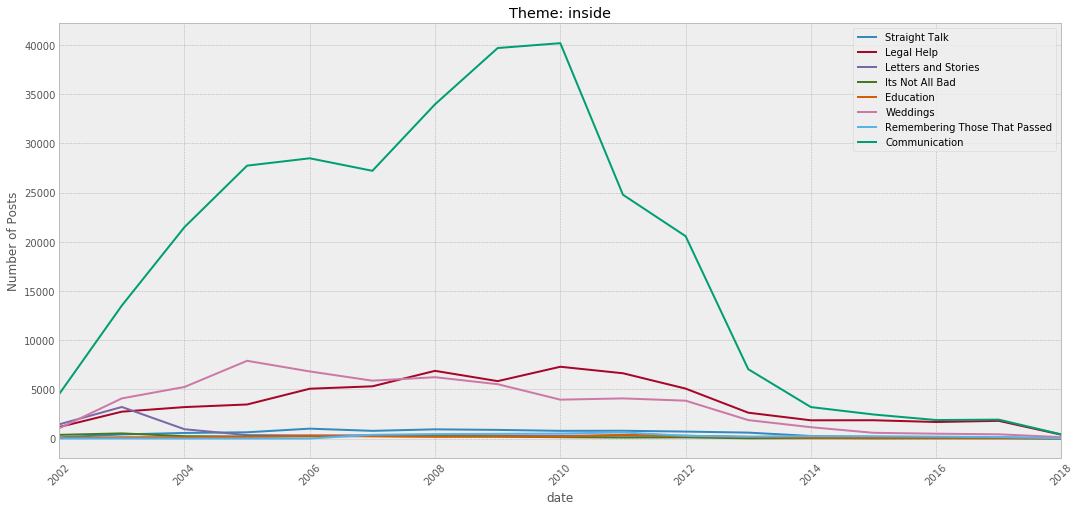

general


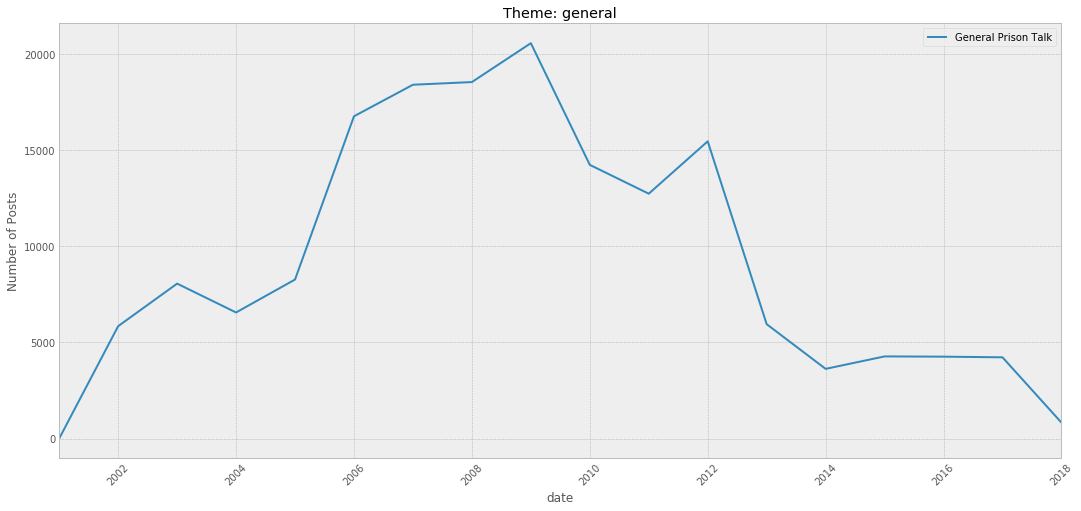

intro


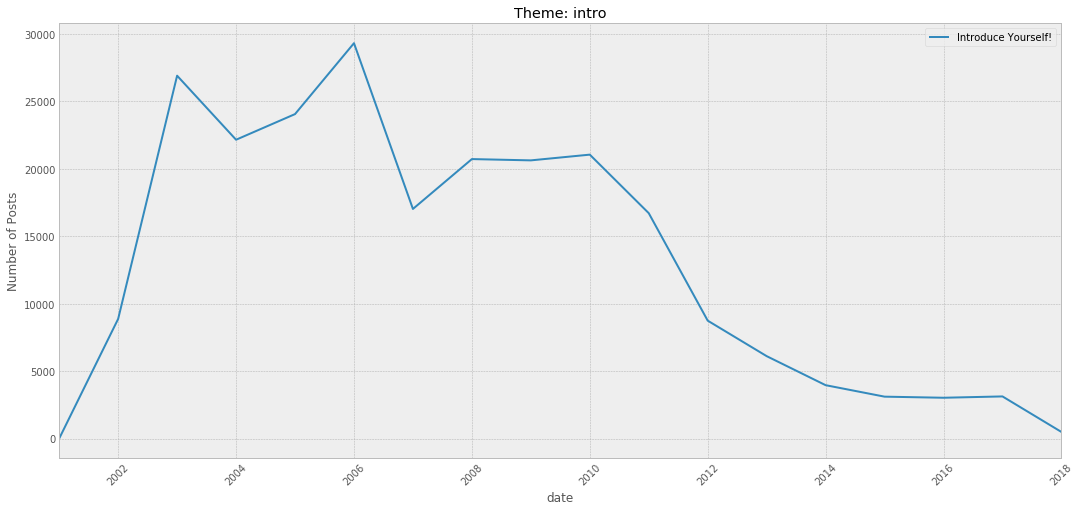

kin


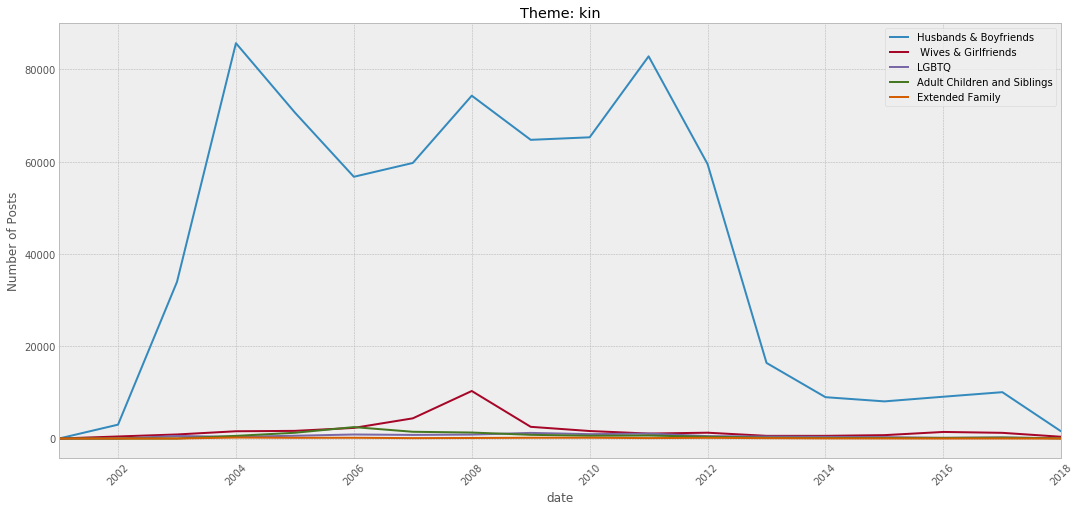

addiction


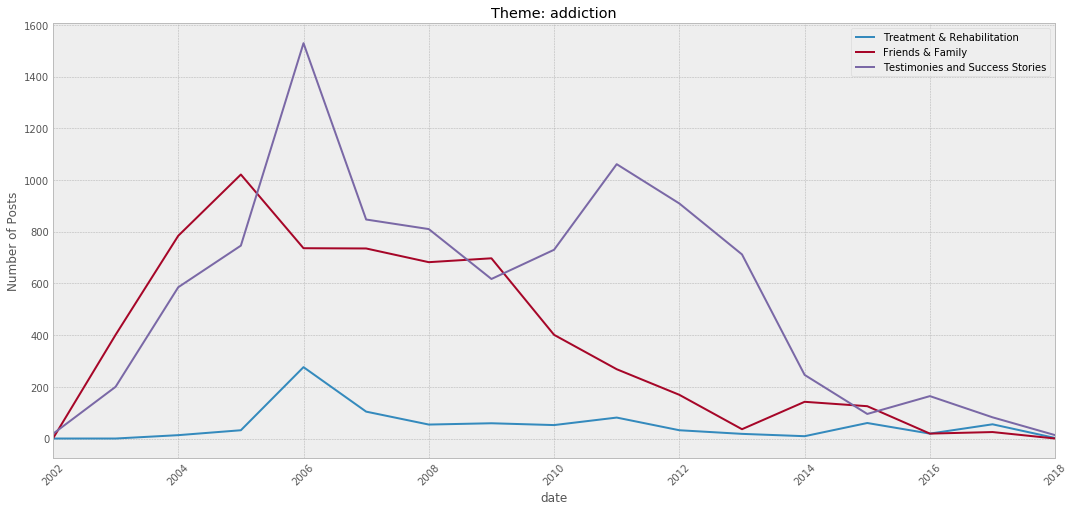

post


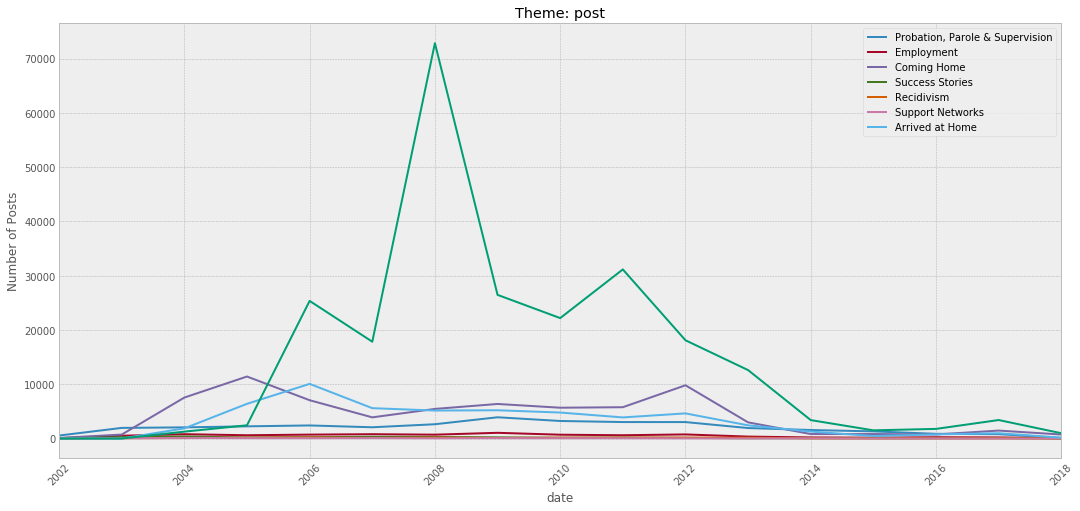

loving


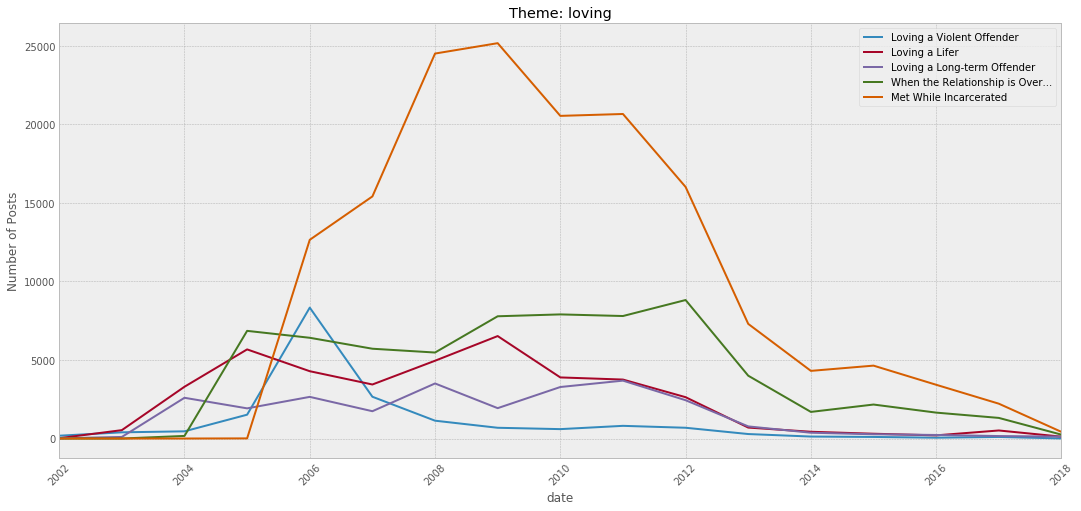

In [209]:
for key, theme in forums.items():
    
    print key
    
    by_year = theme.groupby('fid').resample('y').count()['fid']
    by_year = by_year.unstack(level=0, fill_value=0)
    
    by_year.plot(figsize=(16, 8))
    
    plt.title('Theme: ' + key)
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.legend(forum_names[key]);
    plt.show()

In [1]:
def lookup_key(fid):

    theme_fids = {'general': [39], 'intro': [38], 'pre': [91],
                  'inside' : [72, 124, 1506, 126, 1035, 51, 92, 105],
                  'death_row' : [66, 375, 116, 114],
                  'post' : [52, 206, 372, 53, 208, 209, 207],
                  'parent_child' : [75, 1377, 1534, 65, 94],
                  'kin': [44, 110, 192, 240, 241],
                  'loving': [645, 211, 242, 180, 412],
                  'addiction': [202, 584, 583]}
    
    key = 'unknown'
    
    for theme, fids in theme_fids.items():
        if fid in fids:
            key = theme
            
    return key

# print lookup_key(208), lookup_key(35465) # post unknown

In [9]:
def get_forum_files(forum_path, suffix):
    
    forum_path = Path(forum_path)
    all_files = [str(file) for file in forum_path.rglob('*.' + suffix)]
    
    return all_files

In [3]:
def get_forum_id(forum_path):
    
    forum_id = forum_path.split('/')[-1].split('_')[1]

    return forum_id

# forum_path = '/l/nx/data/deepspace/prisontalk/data/fid_583_posts.csv'
# fid = get_forum_id(forum_path)
# fid

In [4]:
def get_forum_ids(forum_paths):
    
    forum_ids = [int(get_forum_id(forum_path)) for forum_path in forum_paths]
    
    return forum_ids


# data_path = '/l/nx/data/deepspace/prisontalk/data/'
# forum_posts_path = 'forums/parsed/posts/'
# forum_files = get_forum_files(data_path + forum_posts_path, 'csv')
# file_fids = get_forum_ids(forum_files)
# print len(file_fids)

In [5]:
def create_fid_to_name_dict(df, key, value):
    
    keys = df[key]
    values = df[value]
    
    return dict(zip(keys, values))

# scraped_ids = pd.read_csv(data_path + 'forums/scraped_ids.csv')
# fid_to_name = create_fid_to_name_dict(scraped_ids, 'fid', 'name')

# for fid, name in fid_to_name.items()[:5]:
#     print fid, name
    
# # 645 Met While Incarcerated
# # 1035 Remembering Those That Passed While In Prison
# # 412 When the Relationship is Over...
# # 928 The Countdown
# # 38 Introduce Yourself!